# Experiment - 5

# Objective : Perform Linear Regression on given dataset.


## Practice

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.loadtxt("data.csv", delimiter=',')

In [3]:
# print(data)
X = data[:, 0]
Y = data[:, 1]

In [4]:
X.shape, Y.shape
# print(type(X))

((100,), (100,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [6]:
x_train.shape, y_train.shape

((70,), (70,))

In [7]:
def fit(x_train, y_train):
    numerator = (x_train*y_train).mean() - x_train.mean()*y_train.mean()
    denominator = (x_train**2).mean() - (x_train.mean())**2
    
    m = (numerator)/(denominator)
    c = y_train.mean() - m*x_train.mean()
    
    return m, c

In [8]:
def score(y_pred, y_truth):
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    
    ratio = u/v
    return 1-ratio

In [9]:
def predict(x, m, c):
    return m*x + c

In [10]:
def cost(x, y, m, c):
    return ((y-(m*x)-c)**2).mean()

In [11]:
m, c = fit(x_train, y_train)
y_test_pred = predict(x_test, m, c)
test_score = score(y_test_pred, y_test)
print("Test Score: ", test_score)

y_train_pred = predict(x_train, m, c)
train_score = score(y_train_pred, y_train)
print("Train Score: ", train_score)

print("M, C: ", m, c)

cost_training = cost(x_train, y_train, m, c)
print("Cost on Training Data: ", cost_training)

Test Score:  0.5587683097674403
Train Score:  0.6094863135543196
M, C:  1.3695538235109581 5.1623801444003306
Cost on Training Data:  113.85941413059459


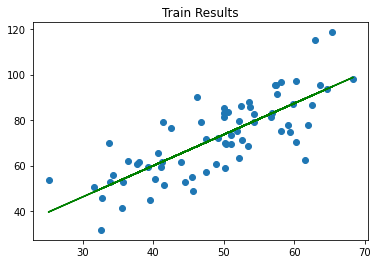

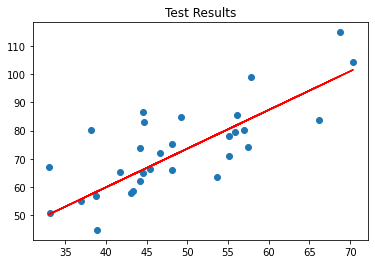

In [12]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, 'g')
plt.title("Train Results")
plt.show()

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.title("Test Results")
plt.show()

In [13]:
# from sklearn inbuilt model
alg = LinearRegression()
train_1d = x_train.reshape(-1, 1)
alg.fit(train_1d, y_train)

test_1d = x_test.reshape(-1, 1)
y_pred = alg.predict(test_1d)

m = alg.coef_[0]
c = alg.intercept_

print("M, C: ", m, c)

print("Test Score: ",alg.score(test_1d, y_test))

M, C:  1.369553823510966 5.162380144399947
Test Score:  0.5587683097674394


## Assesment - 1

In [14]:
salary_df = pd.read_csv("Salary_Data.csv")

In [15]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [17]:
data = salary_df.to_numpy()
data.shape

(30, 2)

In [18]:
X = data[:, 0]
Y = data[:, 1]
X.shape, Y.shape

((30,), (30,))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train.shape, x_test.shape

((22,), (8,))

In [20]:
alg1 = LinearRegression()
train_1d = x_train.reshape(-1, 1)
alg1.fit(train_1d, y_train)

test_1d = x_test.reshape(-1,1)
y_pred = alg1.predict(test_1d)
m, c = alg1.coef_[0], alg1.intercept_
print("M, C: ", m, c)

test_1d = x_test.reshape(-1, 1)
test_score = alg1.score(test_1d, y_test)
print("Test Score: ", test_score)

M, C:  9474.425744194159 25299.627848898395
Test Score:  0.9557959069592484


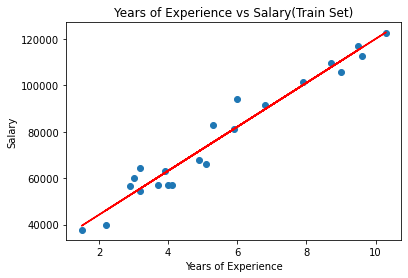

In [21]:
plt.scatter(x_train, y_train)
train_1d = x_train.reshape(-1, 1)
plt.plot(train_1d, alg1.predict(train_1d), 'r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary(Train Set)")
plt.show()

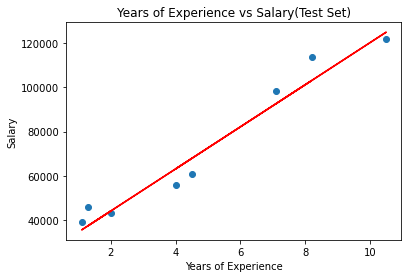

In [22]:
# Visualizing the results

plt.scatter(x_test, y_test)
plt.plot(test_1d, y_pred, 'r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary(Test Set)")
plt.show()

## Assesment - 2

In [23]:
housing_df = pd.read_csv("housing.csv")

In [24]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Data Visualisation

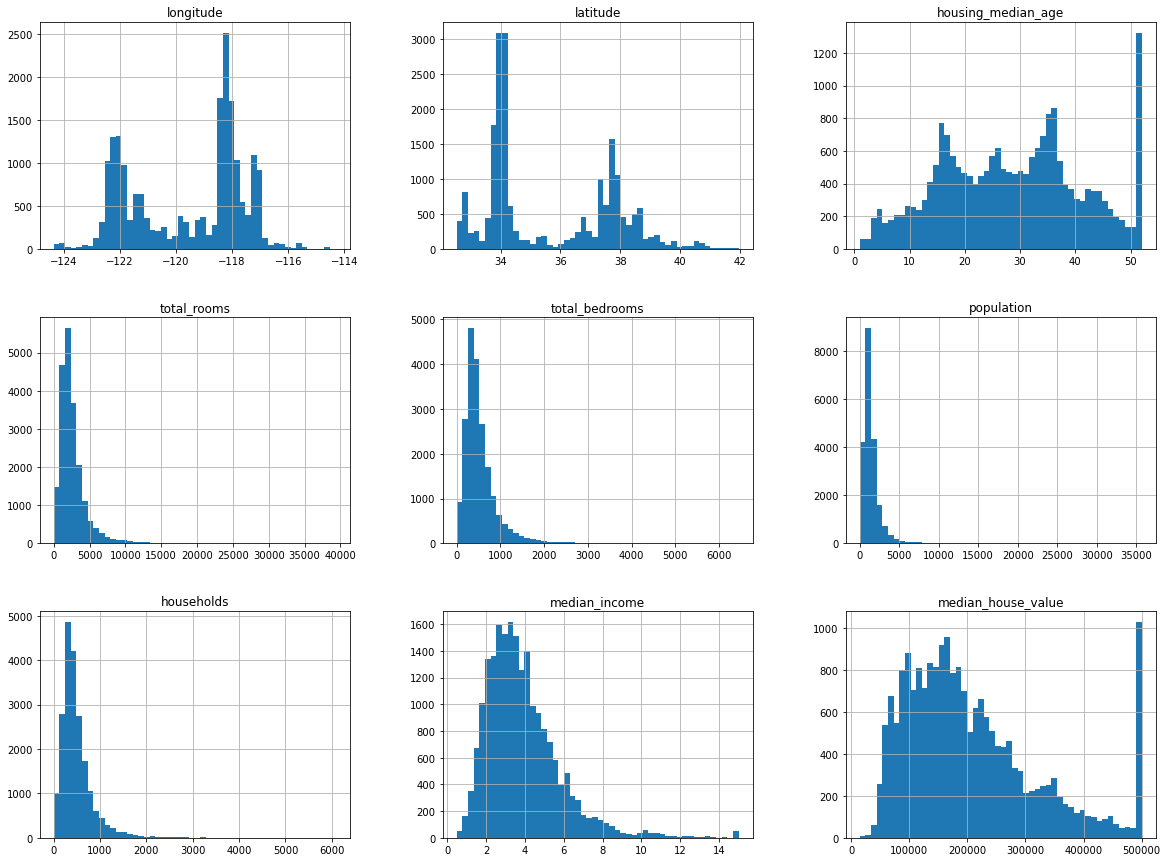

In [27]:
housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

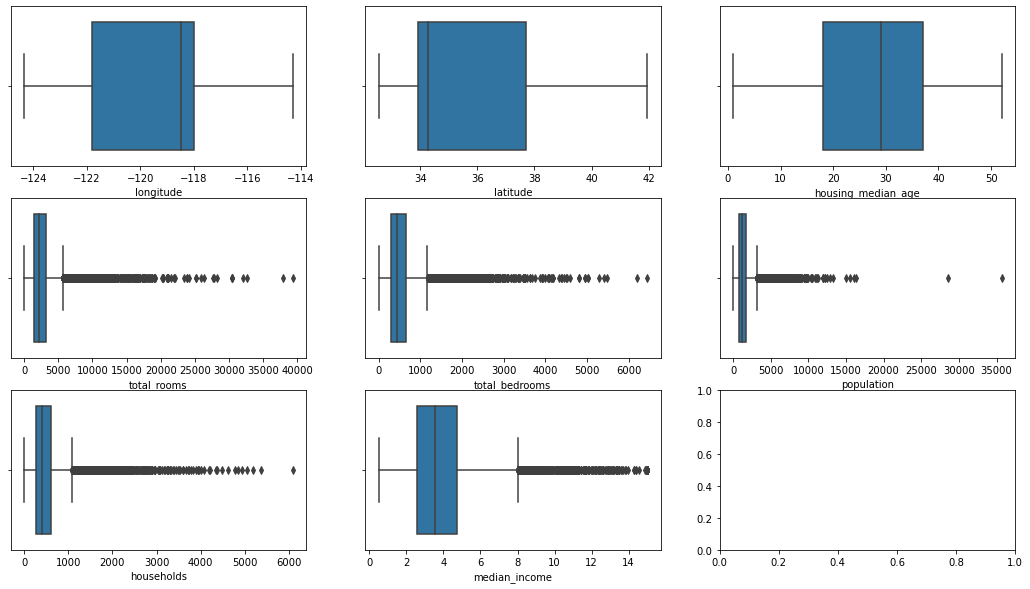

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=housing_df, x='longitude')
sns.boxplot(ax=axes[0, 1], data=housing_df, x='latitude')
sns.boxplot(ax=axes[0, 2], data=housing_df, x='housing_median_age')
sns.boxplot(ax=axes[1, 0], data=housing_df, x='total_rooms')
sns.boxplot(ax=axes[1, 1], data=housing_df, x='total_bedrooms')
sns.boxplot(ax=axes[1, 2], data=housing_df, x='population')
sns.boxplot(ax=axes[2, 0], data=housing_df, x='households')
sns.boxplot(ax=axes[2, 1], data=housing_df, x='median_income')
plt.show()

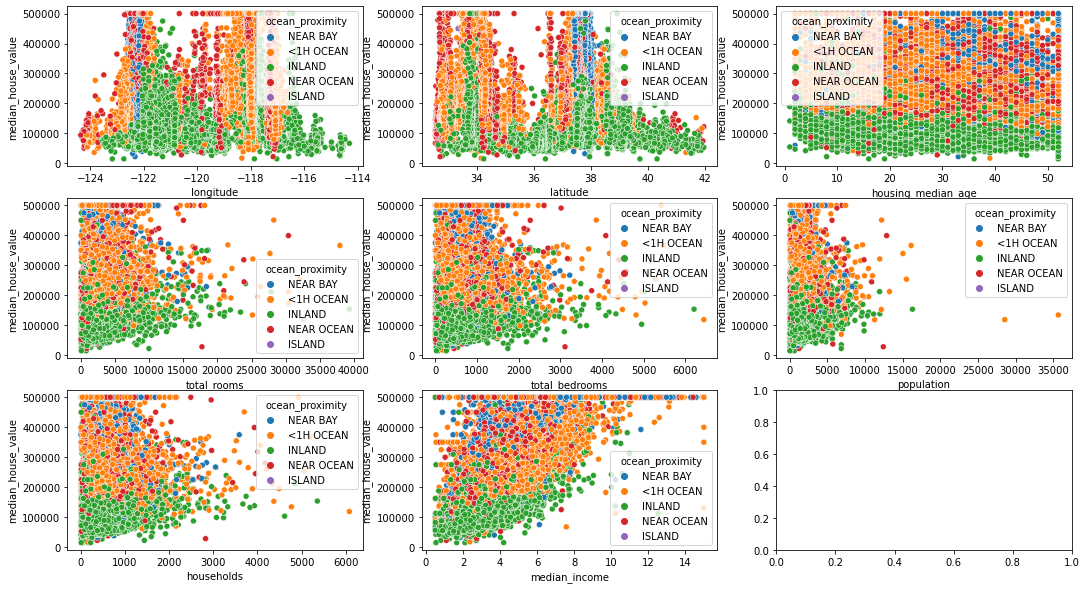

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.scatterplot(ax=axes[0, 0], data=housing_df, x='longitude', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[0, 1], data=housing_df, x='latitude', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[0, 2], data=housing_df, x='housing_median_age', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[1, 0], data=housing_df, x='total_rooms', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[1, 1], data=housing_df, x='total_bedrooms', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[1, 2], data=housing_df, x='population', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[2, 0], data=housing_df, x='households', y ='median_house_value',hue='ocean_proximity')
sns.scatterplot(ax=axes[2, 1], data=housing_df, x='median_income', y ='median_house_value',hue='ocean_proximity')

plt.show()

### Data Cleaning and Filtering

In [30]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
housing_df = housing_df.dropna()
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [32]:
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [33]:
housing_df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

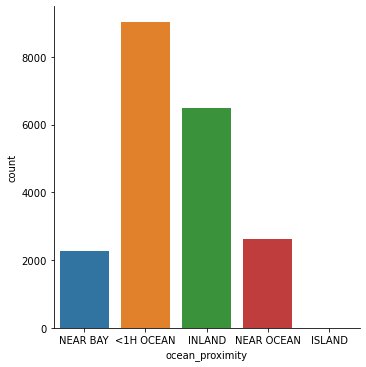

In [34]:
sns.catplot(x='ocean_proximity', data=housing_df, kind='count')
plt.show()

In [35]:
housing_df["ocean_proximity"]=housing_df["ocean_proximity"].replace("NEAR BAY",0)
housing_df["ocean_proximity"]=housing_df["ocean_proximity"].replace("NEAR OCEAN",0)
housing_df["ocean_proximity"]=housing_df["ocean_proximity"].replace("<1H OCEAN",1)
housing_df["ocean_proximity"]=housing_df["ocean_proximity"].replace("INLAND",2)
housing_df["ocean_proximity"]=housing_df["ocean_proximity"].replace("ISLAND",3)

In [36]:
housing_df.drop('ocean_proximity', axis=1, inplace=True)

In [37]:
filt=housing_df["households"]<6000
housing_df=housing_df.loc[filt]
housing_df.shape 

(20432, 9)

In [38]:
filt=housing_df["population"]<20000
housing_df=housing_df.loc[filt]
housing_df.shape 

(20431, 9)

In [39]:
filt=housing_df["total_bedrooms"]<6000
housing_df=housing_df.loc[filt]
housing_df.shape 

(20430, 9)

In [40]:
filt=housing_df["total_rooms"]<35000
housing_df=housing_df.loc[filt]
housing_df.shape 

(20429, 9)

In [41]:
X=housing_df.iloc[:,:9]
Y=housing_df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(20429, 9)
(20429,)


### Linear Regression

In [54]:
prices = housing_df['median_house_value']
features = housing_df.drop('median_house_value', axis = 1)
print(type(prices))
print(prices.shape)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2)

<class 'pandas.core.series.Series'>
(20429,)


In [43]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [44]:
print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index=X_train.columns, columns = ['Coef'])

Intercept -3552442.787292319


,Coef
longitude,-42459.847588
latitude,-42419.412026
housing_median_age,1105.595466
total_rooms,-7.813851
total_bedrooms,114.691680
population,-43.414153
households,55.409100
median_income,40017.155166


In [45]:
regr.score(X_train, y_train)

0.6394252123767807

In [46]:
regr.score(X_test, y_test)

0.6418631052051078

In [47]:
housing_df['median_house_value'].skew()

0.9782571251811077

In [48]:
y_log = np.log(housing_df['median_house_value'])
y_log.tail()

20635    11.265745
20636    11.252859
20637    11.432799
20638    11.346871
20639    11.400876
Name: median_house_value, dtype: float64

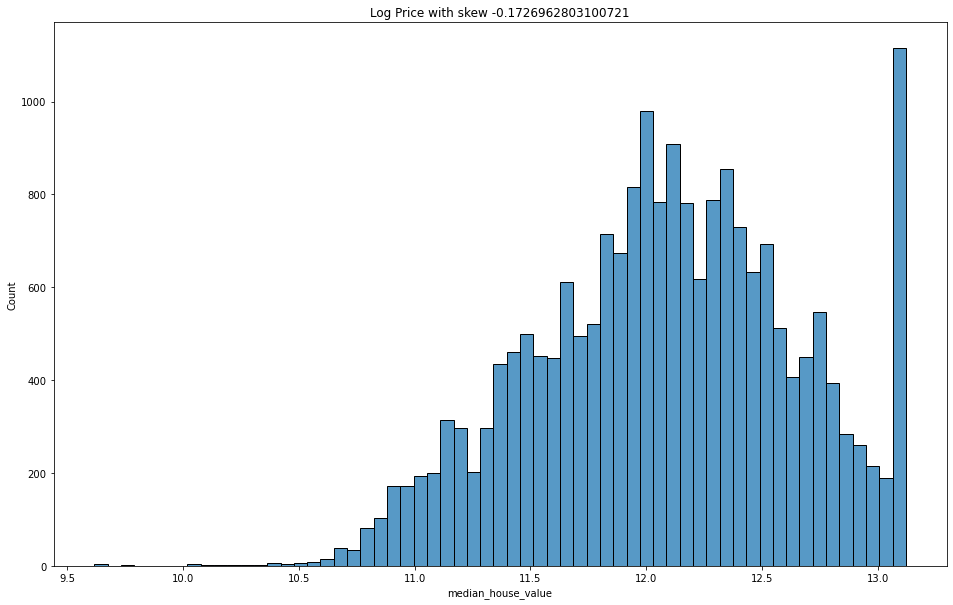

In [49]:
plt.figure(figsize=(16, 10))
sns.histplot(y_log)
plt.title(f'Log Price with skew {y_log.skew()}')
plt.show()

<Figure size 1152x720 with 0 Axes>

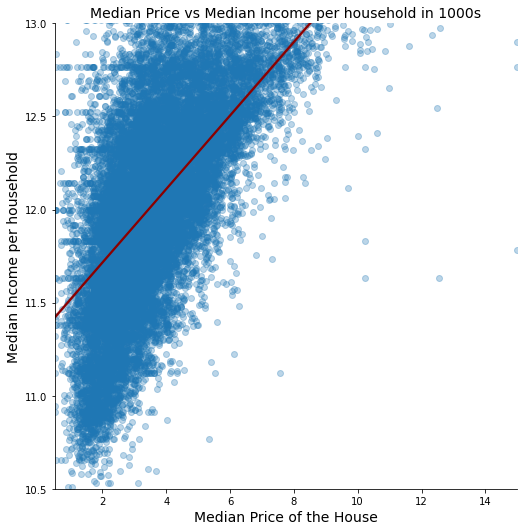

In [50]:
transformed_df = features
transformed_df['log_median_value'] = y_log

plt.figure(figsize=(16, 10))
sns.lmplot(x = 'median_income', y ='log_median_value', data=transformed_df, height = 7, scatter_kws={'alpha':0.3}, line_kws={'color':'darkred'})
plt.ylim(10.5, 13)
plt.style.use('dark_background')
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Median Income per household', fontsize = 14)
plt.title('Median Price vs Median Income per household in 1000s', fontsize = 14)
plt.show()

<Figure size 1152x720 with 0 Axes>

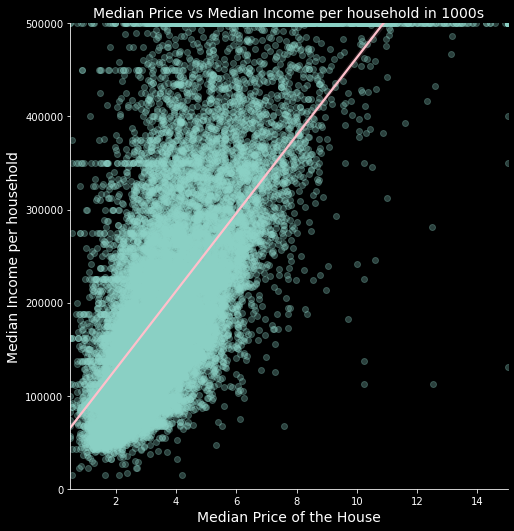

In [51]:
plt.figure(figsize=(16, 10))
sns.lmplot(x = 'median_income', y ='median_house_value', data=housing_df, height = 7, scatter_kws={'alpha':0.3}, line_kws={'color':'pink'})
plt.ylim(0, 500000)
plt.style.use('dark_background')
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Median Income per household', fontsize = 14)
plt.title('Median Price vs Median Income per household in 1000s', fontsize = 14)
plt.show()

In [52]:
prices = np.log(housing_df['median_house_value'])
features = housing_df.drop('median_house_value', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index=X_train.columns, columns = ['Coef'])


Intercept -11.937158986648722


,Coef
longitude,-0.278502
latitude,-0.283169
housing_median_age,0.003208
total_rooms,-0.000026
total_bedrooms,0.000454
population,-0.000197
households,0.000300
median_income,0.174579


In [53]:
regr.score(X_train, y_train)

0.6435271531032833